<a href="https://colab.research.google.com/github/Ankita-Singh-21/MA691-COBRA-13/blob/main/haberman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:

from pycobra.cobra import Cobra
from pycobra.ewa import Ewa
from pycobra.diagnostics import Diagnostics
from pycobra.visualisation import Visualisation
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
path = '/content/drive/MyDrive/Dataset/haberman.csv'
names = ['Age', 'Year operation', 'Axillary nodes detected', 'Survival status']
dataset =pd.read_csv(path,names = names)

# New Section

In [8]:
dataset.head(10)

,Age,Year operation,Axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [28]:
dataset.describe()

,Age,Year operation,Axillary nodes detected,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


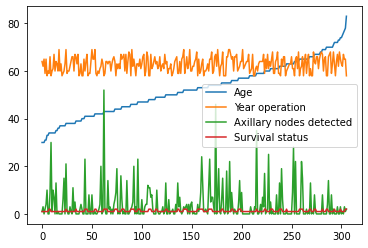

In [30]:
dataset.plot()
plt.show()

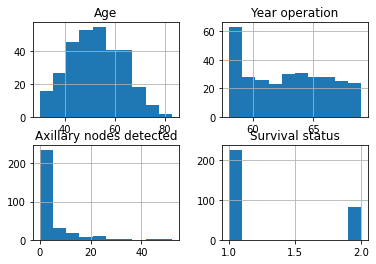

In [31]:
dataset.hist()
plt.show()

Training the Model

In [9]:
array = dataset.values
X= array[:,:3]
Y = array[:,3]
validation_size = 0.3
seed = 10
X_train, X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size = validation_size,random_state = seed)


In [10]:
# Test evaluation and metric
num_folds = 20
num_instances = len(X_train)
seed = 10
scoring = 'accuracy'

In [12]:
algorithms = []
algorithms.append(('LR', LogisticRegression()))
algorithms.append(('LDA', LinearDiscriminantAnalysis()))
algorithms.append(('NB', GaussianNB()))
algorithms.append(('NN', MLPClassifier()))
algorithms.append(('KNN', KNeighborsClassifier()))
algorithms.append(('SVM', SVC()))
#evaluate each model in turn
results = []
names = []
for name, algorithm in algorithms:
  kfold = KFold(n_splits=20, random_state=10,shuffle=True) 
  cv_results = cross_val_score(algorithm, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.740909 (0.119417)
LDA: 0.740909 (0.119417)
NB: 0.745000 (0.126800)
NN: 0.735455 (0.129682)
KNN: 0.722273 (0.141260)
SVM: 0.717273 (0.116097)


In [15]:
for name,algorithm in algorithms:
  model = algorithm
  model.fit(X_train,Y_train)
  predictions = model.predict(X_validation)
  print(name)
  print(accuracy_score(Y_validation, predictions))
  print(confusion_matrix(Y_validation, predictions))
  print(classification_report(Y_validation, predictions))


LR
0.782608695652174
[[67  5]
 [15  5]]
              precision    recall  f1-score   support

           1       0.82      0.93      0.87        72
           2       0.50      0.25      0.33        20

    accuracy                           0.78        92
   macro avg       0.66      0.59      0.60        92
weighted avg       0.75      0.78      0.75        92

LDA
0.782608695652174
[[67  5]
 [15  5]]
              precision    recall  f1-score   support

           1       0.82      0.93      0.87        72
           2       0.50      0.25      0.33        20

    accuracy                           0.78        92
   macro avg       0.66      0.59      0.60        92
weighted avg       0.75      0.78      0.75        92

NB
0.782608695652174
[[66  6]
 [14  6]]
              precision    recall  f1-score   support

           1       0.82      0.92      0.87        72
           2       0.50      0.30      0.37        20

    accuracy                           0.78        92
   macr

Pycobra

In [6]:
array = dataset.values
X= array[:,:3]
Y = array[:,3]
validation_size = 0.3
seed = 10
X_train, X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size = validation_size,random_state = seed)
X_eps = array[1:2]
Y_eps = array[1:2]

NameError: ignored

In [4]:
COBRA_diabetes = Cobra()
COBRA_diabetes.set_epsilon(X_epsilon=X_eps, y_epsilon=Y_eps, grid_points=50)
COBRA_diabetes.fit(X_train, diabetes_Y_train)

NameError: ignored